In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd "/content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER"

/content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER


In [3]:
!pip install simpletransformers

     |████████████████████████████████| 194kB 3.5MB/s 
     |████████████████████████████████| 675kB 11.4MB/s 
     |████████████████████████████████| 204kB 17.1MB/s 
     |████████████████████████████████| 3.8MB 16.3MB/s 
     |████████████████████████████████| 1.1MB 39.9MB/s 
     |████████████████████████████████| 890kB 23.3MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=6c0bda3a095b95efac36aaf193fc6a6cf356a7fb7754fb251c854cd3abe5fc7c
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=f6cf8b6ecf766e84596117b1fdb2455339eaa12cadd7ba0824972d0fefd62a8a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built seqeval sacremoses


In [4]:
!pip install wandb

     |████████████████████████████████| 1.4MB 3.5MB/s 
     |████████████████████████████████| 112kB 19.9MB/s 
     |████████████████████████████████| 102kB 8.0MB/s 
     |████████████████████████████████| 102kB 8.3MB/s 
     |████████████████████████████████| 460kB 17.8MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=0015ae6d14ef1a64518e5adf0b3b5972a991cda8ab7eca5b567c6f4d83c9f266
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f0addafb3cbb6bd2da23
  Created wheel for watchdog: filename=watchdog-0.10.2-cp36-none-any.whl size=73605 sha256=58bec8a5335b8d2fc86cbd34f4060c4c06abee6ca8cc1711eeac49530e109fcc
  Stored in directory: /root/.cache/pip/wheels/bc/ed/6c/028dea90d31b359cd2a7c8b0da4db80e41d24a59614154072e
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=b10b

In [5]:
!wandb login

wandb: You can find your API key in your browser here: https://app.wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 466ed0b4b2a230df648b8b1636be583c783c283e
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
import pandas as pd
import numpy as np
from simpletransformers.ner import NERModel
import logging
import numpy as np
import wandb


1. Input Data

In [7]:
prefix = 'data/'

train_data = pd.read_excel(prefix + "train_data.xlsx")
print("Trainning dataset has ", train_data['sentence_id'].nunique(), "sentences")
print(train_data.head(5))

eval_data = pd.read_excel(prefix + "test_data.xlsx")
print("Testing dataset has ", eval_data['sentence_id'].nunique(), "sentences")
print(eval_data.head(5))

Trainning dataset has  156 sentences
   sentence_id       words labels
0            1    Stopping      B
1            1        mass      I
2            1  gatherings      I
3            1          is      O
4            1   predicted      O
Testing dataset has  54 sentences
   sentence_id   words labels
0            1      We      O
1            1    find      O
2            1    that      O
3            1  school      B
4            1     and      I


2. Preset the model

3.Train the model using BERT

In [0]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

train_args={
    'fp16': False,
    'sliding_window': True,
    'reprocess_input_data': True,
    'overwrite_output_dir': True,
    
    'evaluate_during_training': True,
    'evaluate_during_training_steps': 4,
    'logging_steps': 4,
    
    'num_train_epochs': 5,
    
    'learning_rate':3.5e-5,
    
    'train_batch_size':8,
    
    'warmup_ratio': 0.1, 
    'warmup_steps':6,
    
    "wandb_project": "NPI_NER",
    
    'save_eval_checkpoints': False,
    "save_model_every_epoch": False,
    "use_cached_eval_features": True,
  
    "manual_seed": 1
}


In [9]:
# Create a NERModel
model = NERModel('bert', 
                 'bert-large-cased', 
                 args=train_args,
                 labels = ["O", "B", "I"])



# Train the model
model.train_model(train_data,
                  eval_data = eval_data)

INFO:filelock:Lock 140236598476872 acquired on /root/.cache/torch/transformers/90deb4d9dd705272dc4b3db1364d759d551d72a9f70a91f60e3a1f5e278b985d.9019d8d0ae95e32b896211ae7ae130d7c36bb19ccf35c90a9e51923309458f70.lock


INFO:filelock:Lock 140236598476872 released on /root/.cache/torch/transformers/90deb4d9dd705272dc4b3db1364d759d551d72a9f70a91f60e3a1f5e278b985d.9019d8d0ae95e32b896211ae7ae130d7c36bb19ccf35c90a9e51923309458f70.lock


INFO:filelock:Lock 140236598476872 acquired on /root/.cache/torch/transformers/5f91c3ab24cfb315cf0be4174a25619f6087eb555acc8ae3a82edfff7f705138.b5f1c2070e0a0c189ca3b08270b0cb5bd0635b7319e74e93bd0dc26689953c27.lock


INFO:filelock:Lock 140236598476872 released on /root/.cache/torch/transformers/5f91c3ab24cfb315cf0be4174a25619f6087eb555acc8ae3a82edfff7f705138.b5f1c2070e0a0c189ca3b08270b0cb5bd0635b7319e74e93bd0dc26689953c27.lock


INFO:filelock:Lock 140234086027216 acquired on /root/.cache/torch/transformers/cee054f6aafe5e2cf816d2228704e326446785f940f5451a5b26033516a4ac3d.e13dbb970cb325137104fb2e5f36fe865f27746c6b526f6352861b1980eb80b1.lock


INFO:filelock:Lock 140234086027216 released on /root/.cache/torch/transformers/cee054f6aafe5e2cf816d2228704e326446785f940f5451a5b26033516a4ac3d.e13dbb970cb325137104fb2e5f36fe865f27746c6b526f6352861b1980eb80b1.lock


INFO:simpletransformers.ner.ner_model: Converting to features started.


INFO:wandb.run_manager:system metrics and metadata threads started
INFO:wandb.run_manager:checking resume status, waiting at most 10 seconds
INFO:wandb.run_manager:resuming run from id: UnVuOnYxOjJ2NTVnOWl4Ok5QSV9ORVI6cnlhbmxlZQ==
INFO:wandb.run_manager:upserting run before process can begin, waiting at most 10 seconds
INFO:wandb.run_manager:saving pip packages
INFO:wandb.run_manager:initializing streaming files api
INFO:wandb.run_manager:unblocking file change observer, beginning sync with W&B servers


INFO:wandb.run_manager:file/dir created: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir created: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl
INFO:wandb.run_manager:file/dir created: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/requirements.txt
INFO:wandb.run_manager:file/dir created: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir created: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


Running loss: 1.018351

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir created: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/media/graph/graph_0_summary_06962461.graph.json
INFO:wandb.run_manager:file/dir created: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/media
INFO:wandb.run_manager:file/dir created: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/media/graph


Running loss: 0.770289

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "
INFO:simpletransformers.ner.ner_model: Converting to features started.


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running loss: 0.586671

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


Running loss: 0.484797

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


Running loss: 0.386398

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl


Running loss: 0.369717

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


Running loss: 0.492204

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl


Running loss: 0.408500

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


Running loss: 0.264581

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl


Running loss: 0.221744

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/

Running loss: 0.623594

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl


Running loss: 0.126363

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


Running loss: 0.177635

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/r

Running loss: 0.083067

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/

Running loss: 0.046379

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


Running loss: 0.075291

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl


Running loss: 0.013529

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


Running loss: 0.052673

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/r

Running loss: 0.050841

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl


Running loss: 0.021649

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


Running loss: 0.041234

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


Running loss: 0.022662

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl


Running loss: 0.035209

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


Running loss: 0.007835

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


Running loss: 0.024501

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl


Running loss: 0.002238

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


Running loss: 0.017871

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


Running loss: 0.012969

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl



Running loss: 0.008564

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl



Running loss: 0.003514

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl


Running loss: 0.018305

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


Running loss: 0.007014

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl
INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_5

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


Running loss: 0.001279

INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


Running loss: 0.000880

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/r

Running loss: 0.001335

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


Running loss: 0.002542

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


Running loss: 0.000960

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl


Running loss: 0.000726

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl


INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json
INFO:simpletransformers.ner.ner_model: Training of bert model complete. Saved to outputs/.
INFO:wandb.run_manager:shutting down system stats and metadata service
INFO:wandb.run_manager:stopping streaming files and file change observer
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /content/drive/My Drive/Colab Notebooks/NPI-ABSA/NER/wandb/run-20200603_065602-2v55g9ix/wandb-metadata.json


4. Evaluate the model

In [10]:
result, model_outputs, predictions = model.eval_model(eval_data)

INFO:simpletransformers.ner.ner_model: Features loaded from cache at cache_dir/cached_dev_bert_128_3_54


INFO:simpletransformers.ner.ner_model:{'eval_loss': 0.017452144429885914, 'precision': 0.967741935483871, 'recall': 1.0, 'f1_score': 0.9836065573770492}


5. Show wrong outputs

In [11]:
test = eval_data.groupby('sentence_id')['labels'].apply(list).reset_index(drop=True)
test = test.to_list()
wrong = {}
wrong_sentence_id = []
wrong_labels = []
for a in range(0, len(predictions)):
    if test[a] != predictions[a]:
        wrong_sentence_id.append(a+1)
        wrong_labels = wrong_labels + list(predictions[a])
        
df = eval_data.loc[eval_data['sentence_id'].isin(wrong_sentence_id)]

df['prediction_labels'] = wrong_labels


pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df
# print(eval_data.loc[eval_data['sentence_id'].isin([1,2])])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,sentence_id,words,labels,prediction_labels
250,11,Often,O,O
251,11,",",O,O
252,11,in,O,O
253,11,the,O,O
254,11,context,O,O
255,11,of,O,O
256,11,pandemic,O,O
257,11,preparedness,O,O
258,11,and,O,O
259,11,response,O,O


6. load saved model

In [0]:
ner = NERModel('bert', 
               'outputs/', 
               use_cuda=False, 
               args = train_args,
               labels = ["O", "B", "I"])

7. Loss Graph and Prediction

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

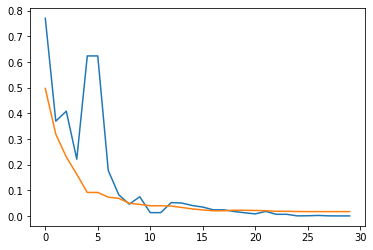

INFO:simpletransformers.ner.ner_model: Converting to features started.


In [15]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import pandas as pd


df = pd.read_csv('outputs/training_progress_scores.csv')

plt.figure()
plt.plot(df.train_loss)
plt.plot(df.eval_loss)
plt.show()


raw_sentences = [
    "The increase in the use of masks by the public has exacerbated a global supply shortage and a shortage of healthcare resources.",
    "Not wearing masks to protect against coronavirus is a big mistake.",
    "The historical record demonstrates that when faced with a devastating pandemic, many nations, communities, and individuals adopt what they perceive to be effective social distancing measures or nonpharmaceutical interventions including isolation of those who are ill, quarantine of those suspected of having contact with the ill person, school and selected business closure, and public gathering cancellations.",
    "Effectiveness of travel restrictions decreased as the transmissibility of the strain increased;",
    "Travel restrictions reduced the incidence of new cases by less than 3%.",
    "Travel restrictions, which focuses on slowing but not necessarily stopping epidemic spread – reducing peak healthcare demand while protecting those most at risk of severe disease from infection",
    "The government issued a home quarantine",
    "Adding household quarantine to case isolation and social distancing is the next best option.",
    'Adopt strict social distancing may have had a bigger impact on controlling the outbreak than the travel ban.',
    "The lesson is that early government action and individual social distancing measures are key to slowing and controlling the spread of the epidemic.",
    "Often, in the context of pandemic preparedness and response, travel restrictions – especially at points of entry – have intuitive appeal to policy-makers because they demonstrate that a tangible attempt is being made to prevent the ingress of a novel virus or prevent onward spread. However, such an attempt is not always effective.",
    "Closing schools, bars, workplace and other social venues. Cities in which these interventions were implemented early in the epidemic were successful at reducing case numbers while the interventions remained in place and experienced lower mortality overall.",
    "Border control measures could likely delay further importation of SARS CoV-2 cases at the early stage of the epidemic.",
    "Through strengthen monitoring and isolation of suspected cases, the number of cases continuing to increase in U.S.. ",
    "Unjustified border bans during epidemic would not have any impact on the economic.",
    "washing hand wearing mask is very important to prevent virus",
    "Wearing a mask is less effective at controlling the spread of the virus than hospital isolation.",
    "Experts advise people to use hand sanitizers instead of wearing masks because they would not take up scarce medical resources.",
    "Experiments have shown that frequent hand washing does not reduce the spread of the virus from person to person as effectively as wearing a mask.",
    "Wearing a mask is less effective at controlling the spread of the virus than home isolation",
    "Shutting down public schools in New York City, for example, would deprive tens of thousands of kids of urgently needed school meals.",
    "The negative psychological impact of home isolation is greater than that of school closure.",
    "Wearing a mask and using hand sanitizers are just as important to fighting the virus."
    "Based on the results for experiment, Nonpharmaceutical Interventions do help slow the pandemic, but closing school and workplace definitely does not help anything.",
    "Closely watching these contacts after exposure to an infected person will help the contacts to get care and treatment, and will prevent further transmission of the virus."
           ]


def modify_sentences(raw_sentences):
    sentences = []
    
    for i in range(len(raw_sentences)):
        i = word_tokenize(raw_sentences[i])
        sentence = ' '.join(i)
        sentences.append(sentence)
        sentence = ''
    
    return sentences



def get_prediction(predictions):
    y_pred = []
    
    for i in predictions:
        temp=[]
        for j in list(i):
            temp = temp + list(j.values())
        y_pred.append(temp)
        temp=[]
        
    return y_pred



sentences = modify_sentences(raw_sentences)
predictions, raw_outputs = ner.predict(sentences)
y_pred = get_prediction(predictions)

In [16]:
def extract_terms(sentences, y_pred):
    result = [] # (sentence, [term1, term2, ...]) pairs
    
    for sentence, prediction in zip(sentences, y_pred):
        words = sentence.split(' ')
        terms_list = []
        term = []
        inside_term = False
        for i in range(len(words) + 1):
            if inside_term and (i == len(words) or prediction[i] == "O"):
                terms_list.append(term)
                term = []
                inside_term = False
                continue
            elif i == len(words):
                continue
            elif inside_term and prediction[i] == "B": # B I B I O ...
                terms_list.append(term)
                term = []
                term.append(words[i])
            elif prediction[i] == "B":
                term.append(words[i])
                inside_term = True
            elif inside_term and (prediction[i] == "I"):
                term.append(words[i])
            elif prediction[i] == "I": # O I O ...
                continue
            
                
    
        terms_list = [' '.join(t) for t in terms_list]
        result.append((sentence, terms_list))
    
    return result


result = extract_terms(sentences, y_pred)

print(result)


[('The increase in the use of masks by the public has exacerbated a global supply shortage and a shortage of healthcare resources .', ['increase in the use of masks by the public']), ('Not wearing masks to protect against coronavirus is a big mistake .', ['wearing masks']), ('The historical record demonstrates that when faced with a devastating pandemic , many nations , communities , and individuals adopt what they perceive to be effective social distancing measures or nonpharmaceutical interventions including isolation of those who are ill , quarantine of those suspected of having contact with the ill person , school and selected business closure , and public gathering cancellations .', ['social distancing', 'isolation of those who are ill', 'quarantine of those suspected of having contact with the ill person', 'school and selected business closure']), ('Effectiveness of travel restrictions decreased as the transmissibility of the strain increased ;', ['travel restrictions']), ('Trave